In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [6]:
data=pd.read_csv('E:/Notes/machine-learning-ex1/ex1data1.csv')
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data=np.array(data)

In [8]:
X=data[:,0]
y=data[:,1]

Text(0, 0.5, 'Profit in 10,000s $')

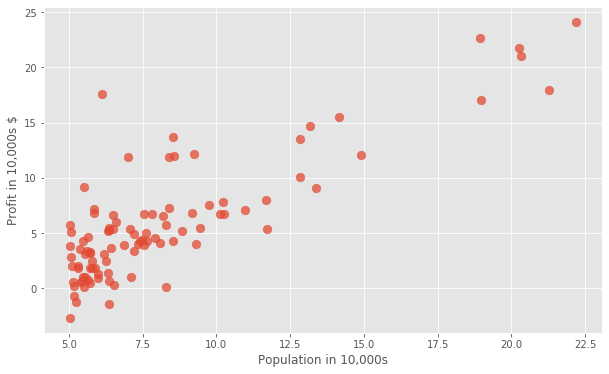

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(X,y,s=75,alpha=0.75)
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in 10,000s $')

In [10]:
X=np.c_[np.ones((97,1)),X]

In [11]:
def cost(X,y,theta):
    m=y.size
    h=np.dot(X,theta)#Hypothesis value
    j=(1/(2*m))*np.sum(np.square(h-y))# Cost value
    return j

In [12]:
cost(X,y,np.array([0.,0.]))

32.072733877455676

In [13]:
cost(X,y,np.array([-1.,2.]))

54.24245508201238

In [14]:
def gradientdescent(X,y,theta,alpha,num):
    m = y.size
    theta = theta.copy()
    J_history = [] 
    for i in range(num):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(cost(X, y, theta))
    return theta, J_history                

In [15]:
theta=np.random.randn(2)
num=1500
alpha=0.01

theta,costlist=gradientdescent(X,y,theta,alpha,num)
theta

array([-3.60337555,  1.16365836])

In [16]:
costlist[-1]

4.484755325581886

In [17]:
b=1.17263416*X[:,1]-3.69272178

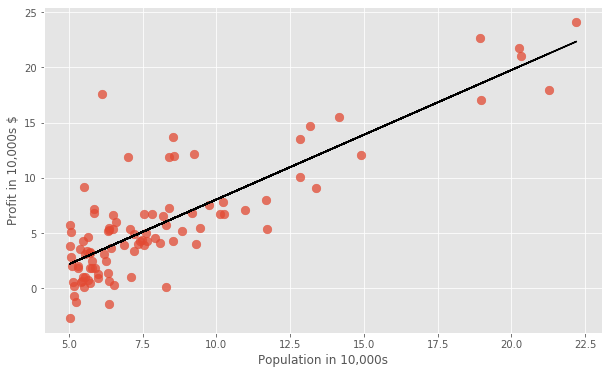

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(X[:,1],y,s=75,alpha=0.75)
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in 10,000s $')
plt.plot(X[:,1],b,'k-')

In [19]:
np.dot(np.array([1,3.5]),theta)*10000

4694.28698623251

### Normal equation

In [20]:
theta1=np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta1

array([-3.89578088,  1.19303364])

In [21]:
b1=1.19303364*X[:,1]-3.89578088

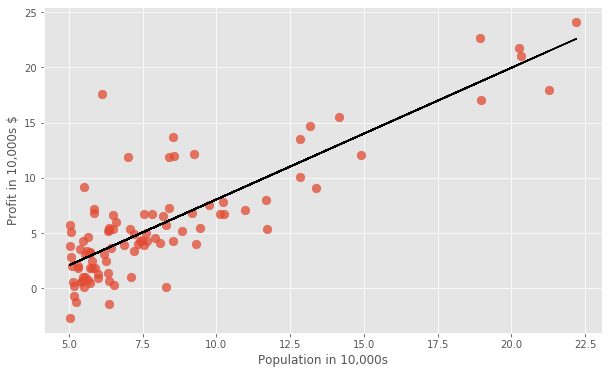

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(X[:,1],y,s=75,alpha=0.75)
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in 10,000s $')
plt.plot(X[:,1],b1,'k-')

## Multiple variables

In [28]:
data=pd.read_csv('E:/Notes/machine-learning-ex1/ex1data2.csv')
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [26]:
stdsize=data['size'].std()
meansize=data['size'].mean()
stdbd=data['bedrooms'].std()
meanbd=data['bedrooms'].mean()

In [29]:
data['size']=(data['size']-meansize)/stdsize
data['bedrooms']=(data['bedrooms']-meanbd)/stdbd

In [30]:
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


In [42]:
data=np.array(data)
X=data[:,0:2]
y=data[:,-1]

In [47]:
X=np.c_[np.ones((47,1)),X]

In [74]:
def multicost(X,y,theta):
    m=y.size
    h=np.dot(X,theta)
    
    j=1/m*1/2*(np.sum((h-y)**2))
    return j

In [77]:
new=pd.read_csv('E:/Notes/machine-learning-ex1/ex1data2.csv')
new=np.array(new)
nX=new[:,0:2]
ny=new[:,-1]
nX=np.c_[np.ones((47,1)),nX]

In [91]:
multicost(nX,ny,np.array([0,0,0]))

65591548106.45744

In [110]:
def mgradientdescent(X,y,theta,alpha,num):
    m = y.size
    theta = theta.copy()
    J_history = [] 
    for i in range(num):
            theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
            J_history.append(multicost(X, y, theta))
    return theta, J_history

In [122]:
theta=np.random.randn(3)
num=3000
alpha=0.01

theta,costlist=mgradientdescent(X,y,theta,alpha,num)
theta

array([340412.65957444, 110630.91065984,  -6649.33465181])

### Normal equation with multiple variable

In [121]:
theta2=np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta2

array([340412.65957447, 110631.05027885,  -6649.47427082])

##### Identical to what we got with Gradient descent